In [1]:
include("Clusterings.jl")

Clusterings

In [2]:
using Clusterings, Plots

In [3]:
A=readdlm("C:\\Users\\User\\Documents\\NCTS\\FCPS\\01FCPSdata\\TwoDiamonds.lrn");

In [4]:
A=float.(A[5:end,2:3]);

In [5]:
f=densityf(A);
G=createGraph(A,3)
S1,S,u=Clustering(G,f,0.2)

3-element Array{Any,1}:
 Set([513, 76, 272])                                                                                                                                                                                 
 Set([76, 272])                                                                                                                                                                                      
 DataStructures.IntDisjointSets([272, 272, 272, 272, 272, 272, 272, 272, 272, 272  …  76, 76, 76, 76, 76, 76, 76, 76, 76, 76], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], -266)

In [6]:
points,plt=PlotClustering(A,S,u)

(794, Plot{Plots.GRBackend() n=2})

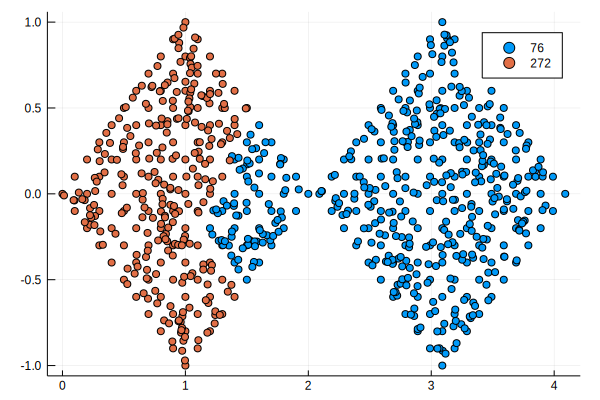

In [7]:
plot(plt)

In [8]:
B=readdlm("C:\\Users\\User\\Documents\\NCTS\\FCPS\\01FCPSdata\\Lsun.lrn")

404×4 Array{Any,2}:
    "%"  400          ""        ""  
    "%"    3          ""        ""  
    "%"    9         1         1    
    "%"     "Key"     "C1"      "C2"
   1       3.2777    0.814082   ""  
   2       0.387577  0.17678    ""  
   3       0.268546  0.582963   ""  
   4       2.03114   0.244597   ""  
   5       0.188677  0.46128    ""  
   6       3.52547   0.265579   ""  
   7       2.22958   0.682189   ""  
   8       3.39207   0.420976   ""  
   9       3.58982   0.832527   ""  
   ⋮                                
 389       2.87321   3.18885    ""  
 390       2.67861   2.33508    ""  
 391       2.76765   2.72605    ""  
 392       2.28857   2.79594    ""  
 393       3.37523   2.58806    ""  
 394       3.36667   3.02512    ""  
 395       2.8496    2.75166    ""  
 396       2.63609   2.05681    ""  
 397       2.9383    2.3212     ""  
 398       3.08091   2.2096     ""  
 399       2.40452   2.64162    ""  
 400       3.24865   2.29729    ""  

In [9]:
B=float.(B[5:end,2:3])

400×2 Array{Float64,2}:
 3.2777    0.814082
 0.387577  0.17678 
 0.268546  0.582963
 2.03114   0.244597
 0.188677  0.46128 
 3.52547   0.265579
 2.22958   0.682189
 3.39207   0.420976
 3.58982   0.832527
 1.22787   0.810909
 1.3007    0.146538
 3.59697   0.421791
 3.10676   0.779664
 ⋮                 
 2.87321   3.18885 
 2.67861   2.33508 
 2.76765   2.72605 
 2.28857   2.79594 
 3.37523   2.58806 
 3.36667   3.02512 
 2.8496    2.75166 
 2.63609   2.05681 
 2.9383    2.3212  
 3.08091   2.2096  
 2.40452   2.64162 
 3.24865   2.29729 

In [10]:
f=densityf(B);
G=createGraph(B,5)
S1,S,u=Clustering(G,f,0.2)
S

Set([95, 203, 330])

In [11]:
points,plt=PlotClustering(B,S,u)

(400, Plot{Plots.GRBackend() n=3})

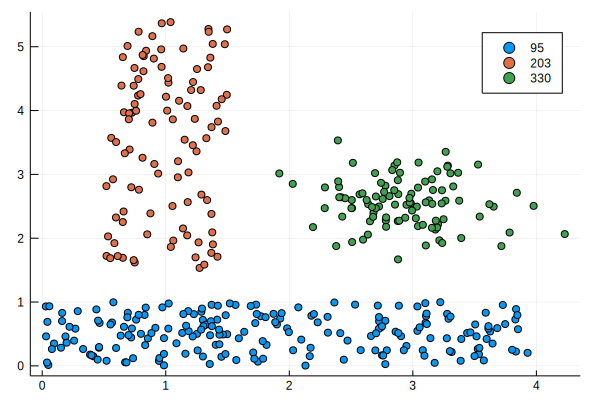

In [12]:
plot(plt)

In [13]:
S1,S,u=Clustering(G,f,50)

3-element Array{Any,1}:
 Set([95, 203, 330])                                                                                                                                                                                 
 Set{Int64}()                                                                                                                                                                                        
 DataStructures.IntDisjointSets([95, 95, 95, 95, 95, 95, 95, 95, 95, 95  …  330, 330, 330, 330, 330, 330, 330, 330, 330, 330], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 1, 0, 0, 0, 0, 0, 0, 0, 0], -169)